<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/SpaceShip_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!mkdir -p ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 71.1MB/s]


In [9]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration and Data Cleaning


In [11]:
train_dataset = pd.read_csv('/content/train.csv')

In [12]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [13]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
train_dataset.shape

(8693, 14)

In [15]:
train_dataset = train_dataset.dropna(subset = ['Name']).reset_index(drop = True)

In [16]:
train_dataset.shape

(8493, 14)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
train_dataset['Transported'] = encoder.fit_transform(train_dataset['Transported'])

In [19]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8489,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8490,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8491,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [20]:
mode = train_dataset['HomePlanet'].mode()
train_dataset['HomePlanet'] = train_dataset['HomePlanet'].replace(np.nan,mode[0])

In [21]:
train_dataset['CryoSleep'] = train_dataset['CryoSleep'].replace(np.nan,train_dataset['CryoSleep'].mode()[0])

In [22]:
train_dataset['CryoSleep'] = encoder.fit_transform(train_dataset['CryoSleep'])

In [23]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           197
Destination     178
Age             176
VIP             202
RoomService     180
FoodCourt       178
ShoppingMall    204
Spa             177
VRDeck          184
Name              0
Transported       0
dtype: int64

In [29]:
train_dataset['Destination'] = train_dataset['Destination'].replace(np.nan,train_dataset['Destination'].mode()[0])

In [32]:
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].median())

In [34]:
train_dataset['VIP'] = encoder.fit_transform(train_dataset['VIP'])

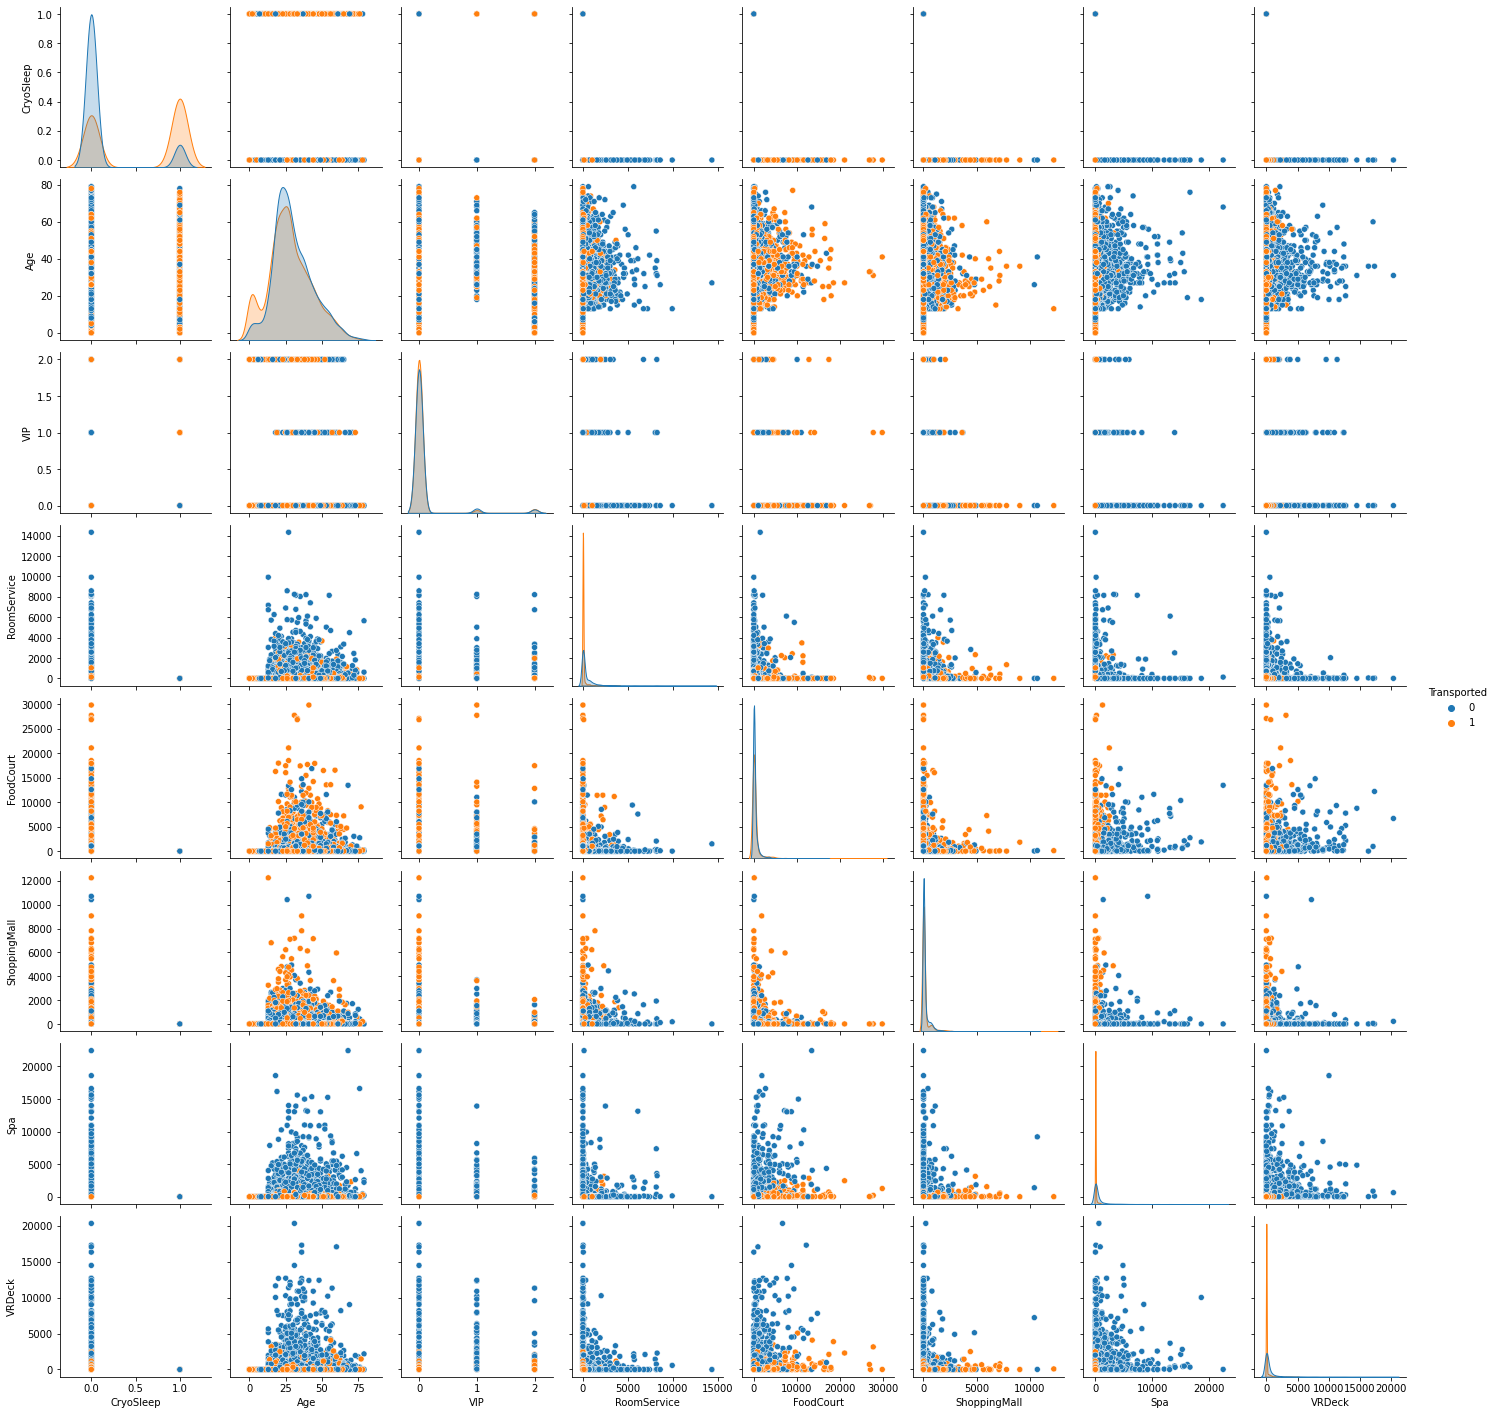

In [39]:
sns.pairplot(train_dataset,hue = 'Transported')

In [58]:
train_dataset['Age_Bin'] = pd.cut(train_dataset['Age'],bins=[0,12,20,40,120],labels=['Children','Teenage','Adult','Senior Citizen'])

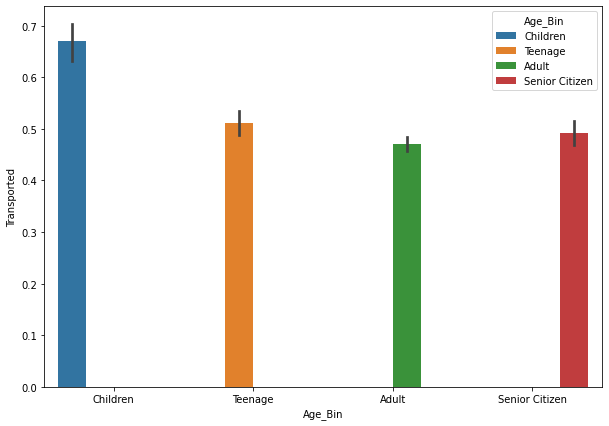

In [60]:
plt.figure(figsize = (10,7))
sns.barplot(data=train_dataset,x="Age_Bin",y="Transported",hue = "Age_Bin")